In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pylab as plt


In [2]:
img_path = 'checkerboard.png'
img_pil = Image.open(img_path).convert('L')
img = np.asarray(img_pil).astype(np.float32) / 255
h,w = img.shape[:2]
# (H,W), (Y,X), (V,U), (R,C)


In [3]:
Iy, Ix = np.gradient(img)
A = Ix * Ix
B = Ix * Iy
C = Iy * Iy
H_total = np.asarray([[A,B],[B,C]])

results = {}
for w_size in [3,7,11]:
    w_r = w_size // 2
    E = np.zeros((h,w))
    for y in range(w_r, h-w_r):
        y0=y-w_r
        y1=y0+w_size
        for x in range(w_r, w-w_r):
            x0=x-w_r
            x1=x0+w_size

            H_pixel = np.sum(H_total[:,:,y0:y1,x0:x1], axis=(2,3))
            E[y][x] = np.min(np.linalg.eigvals(H_pixel))
    results[str(w_size)] = E

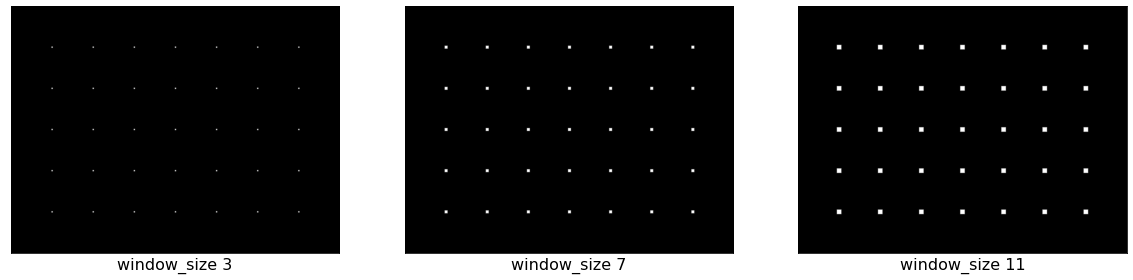

In [4]:
fig = plt.figure(figsize=(20,20))
for idx, (window_size, E) in enumerate(results.items(), start=1):
    ax = fig.add_subplot(1, 3, idx)
    
    ax.imshow(E, cmap=plt.cm.get_cmap('gray'))
    ax.set_xlabel("window_size " + window_size, fontsize=16)
    ax.set_xticks([]), ax.set_yticks([])

plt.savefig('result.png')
plt.show()


In [6]:
np.max(results['3'])

1.5